In [ ]:
Set pip install scikit-image matplotlib numpy


# Image 1

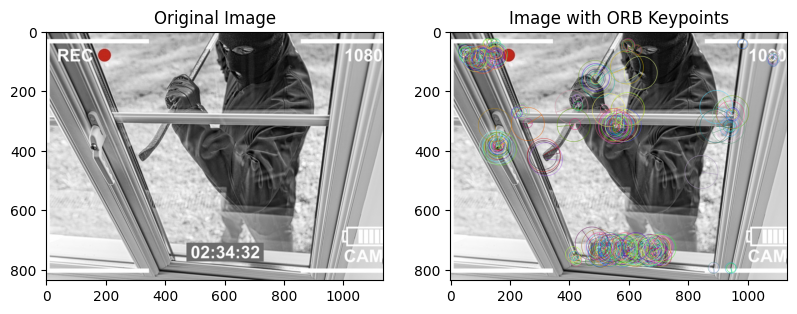

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load the image with salt- pepper noise
image_path = '/content/person.jpg'
image = cv2.imread(image_path)


# this line to convert the  image to grayscale for feature detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector
orb = cv2.ORB_create()

# Detect ORB keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# Draw the keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the original and image with ORB keypoints
plt.figure(figsize=(20, 5))

plt.subplot(141), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(142), plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB)), plt.title('Image with ORB Keypoints')

plt.show()


# Image 2

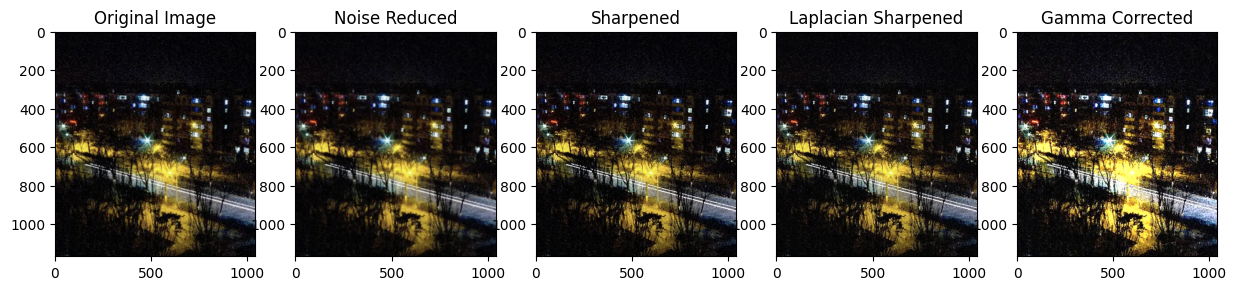

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# to load the image
img_path = '/content/night.jpg'
image = cv2.imread(img_path)

# this line to apply bilateral filter for noise reduction
noiseReduc_image = cv2.bilateralFilter(image, 9, 75, 75)

# Apply image sharpening using a kernel
kernel = np.array([[-1, -1, -1],
                   [-1, 9, -1],
                   [-1, -1, -1]])
sharpened_image = cv2.filter2D(noiseReduc_image, -1, kernel)

# this line to apply laplacian sharpening
laplacian = cv2.Laplacian(sharpened_image, cv2.CV_64F)
sharpened_image_laplacian = sharpened_image - 0.3 * laplacian

# Convert the Laplacian-sharpened image to 8-bit unsigned integer
sharpened_image_laplacian = cv2.convertScaleAbs(sharpened_image_laplacian)

# Apply gamma correction
gamma = 0.9
gamma_corrected = np.clip(sharpened_image_laplacian ** (1/gamma), 0, 255).astype(np.uint8)

# Display the original, noise-reduced, sharpened, Laplacian-sharpened, and gamma-corrected images
plt.figure(figsize=(15, 5))

plt.subplot(151), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(152), plt.imshow(cv2.cvtColor(noiseReduc_image, cv2.COLOR_BGR2RGB)), plt.title('Noise Reduced')
plt.subplot(153), plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB)), plt.title('Sharpened')
plt.subplot(154), plt.imshow(cv2.cvtColor(sharpened_image_laplacian, cv2.COLOR_BGR2RGB)), plt.title('Laplacian Sharpened')
plt.subplot(155), plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB)), plt.title('Gamma Corrected')

plt.show()


# Image 3

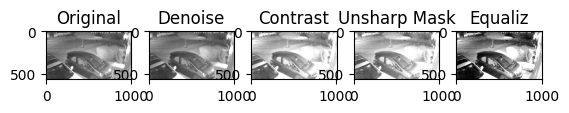

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = '/content/car.png'
image33 = cv2.imread(image_path)

# Convert the image to grayscale
gray_image33 = cv2.cvtColor(image33, cv2.COLOR_BGR2GRAY)

# Apply bilateral filter for noise reduction
noiseReduc_image33 = cv2.bilateralFilter(image33, 9, 75, 75)

# Adjust contrast using cv2.multiply to make img Brightness
contrast_factor = 1.5
contrast_image33 = cv2.multiply(noiseReduc_image33, np.array([contrast_factor]))

# Apply Unsharp Masking for detail enhancement
def unsharp_mask(image, sigma=1.0, strength=1.5):
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    sharpened = cv2.addWeighted(image, 1.0 + strength, blurred, -strength, 0)
    return sharpened

sharpened_image33 = unsharp_mask(contrast_image33)

# Convert the sharpened image to grayscale
sharpened_gray = cv2.cvtColor(sharpened_image33, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization for better contrast
equalized_image33 = cv2.equalizeHist(sharpened_gray)

# Display the original, denoised, contrast-adjusted, unsharp-masked, and equalized images
plt.subplot(151), plt.imshow(cv2.cvtColor(image33, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(152), plt.imshow(cv2.cvtColor(noiseReduc_image33, cv2.COLOR_BGR2RGB)), plt.title('Denoise')
plt.subplot(153), plt.imshow(cv2.cvtColor(contrast_image33.astype(np.uint8), cv2.COLOR_BGR2RGB)), plt.title('Contrast')
plt.subplot(154), plt.imshow(cv2.cvtColor(sharpened_image33.astype(np.uint8), cv2.COLOR_BGR2RGB)), plt.title('Unsharp Mask')
plt.subplot(155), plt.imshow(equalized_image33, cmap='gray'), plt.title('Equaliz')
plt.show()


# Image 4

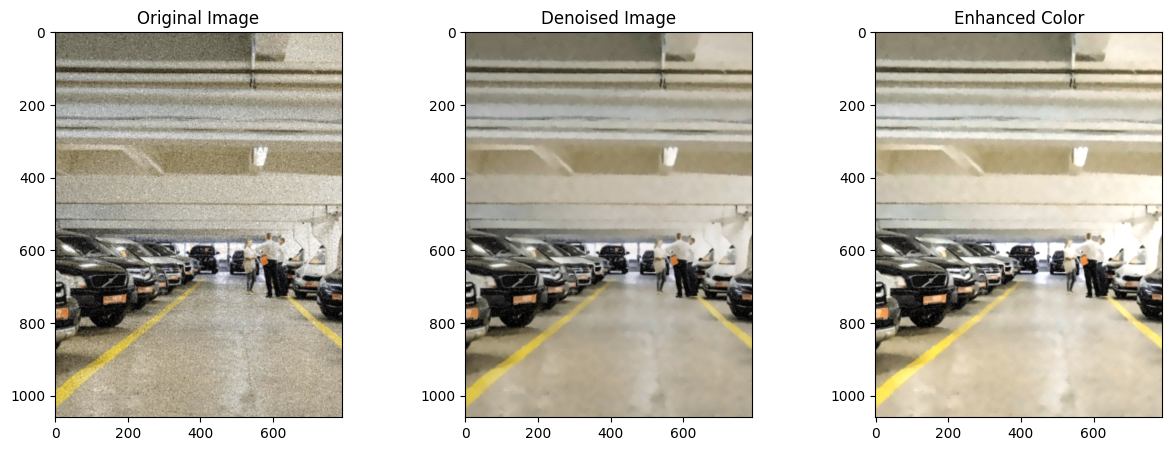

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load the image with salt-and-pepper noise
image_path = '/content/parking.jpg'
image = cv2.imread(image_path)

# Apply Non-Local Means Denoising
denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

# Enhance color by increasing contrast
contrast_factor = 1.2
enhanced_color = cv2.multiply(denoised_image, np.array([contrast_factor]))

# Display the original, denoised, and enhanced color images using plt.subplot
plt.figure(figsize=(15, 5))

plt.subplot(131), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(132), plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB)), plt.title('Denoised Image')
plt.subplot(133), plt.imshow(cv2.cvtColor(enhanced_color.astype(np.uint8), cv2.COLOR_BGR2RGB)), plt.title('Enhanced Color')

plt.show()


In [ ]:
!pip install rembg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.4 MB/s eta 0:00:00


# Image 5

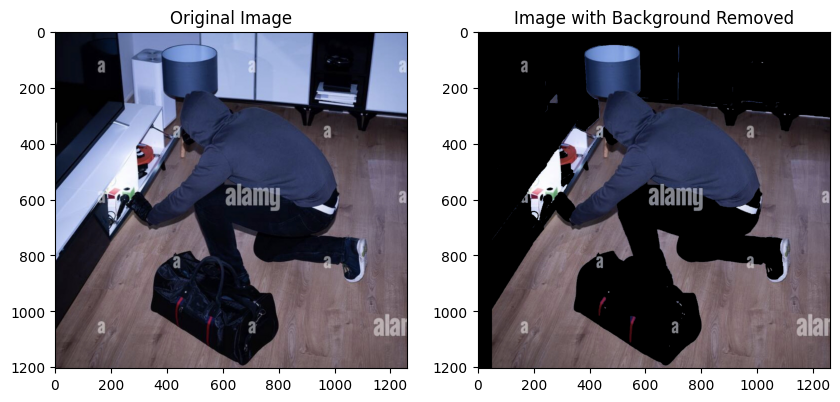

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_background(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Create a mask (binary image) for the foreground and background
    mask = np.zeros(image.shape[:2], np.uint8)

    # Define a rectangle around the object to help GrabCut algorithm
    rect = (50, 50, image.shape[1]-50, image.shape[0]-50)

    # Initialize foreground and background models for GrabCut
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    # Apply GrabCut algorithm
    cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

    # Modify the mask to create a binary mask for the foreground
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    # Apply the binary mask to the original image
    result = image * mask2[:, :, np.newaxis]

    return result

def plot_images(original, processed):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    plt.title('Image with Background Removed')

    plt.show()

# Specify the path to your image
image_path = '/content/person3.jpg'

# Remove background
processed_image = remove_background(image_path)

# Plot the original and processed images
plot_images(cv2.imread(image_path), processed_image)


In [1]:
import cv2
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage.morphology import dilation, erosion

In [2]:
# adjust the brightness and contrast of the image
def enhance_visibility(image, alpha, beta):

    adjusted_image = cv2.convertScaleAbs(image, alpha, beta)

    return adjusted_image

In [3]:
# Apply gamma correction
def Gamma_Correction(image, gamma):
    # Normalize the image to the range [0, 1]
    normalized_image = image / 255.0

    corrected_image = np.power(normalized_image, gamma)

    # Scale the values back to the range [0, 255]
    adjusted_image = (corrected_image * 255).astype(np.uint8)

    return adjusted_image

# Image 6

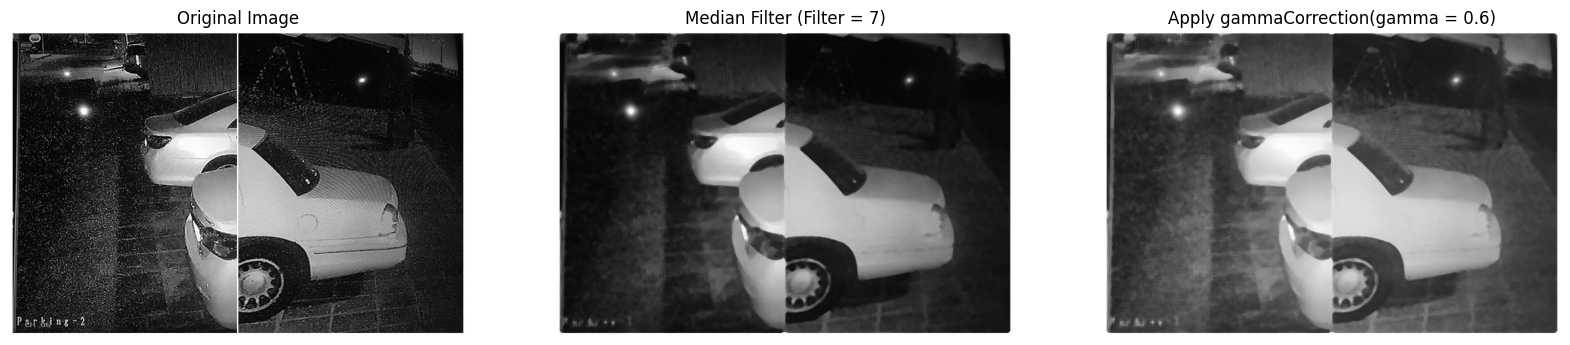

In [5]:
image1 = plt.imread('img1.jpg', 0)

# adjust kernel size for the median filter
kernel_size=7

# Apply the median filter to remove salt and pepper noise
denoised_image = cv2.medianBlur(image1, kernel_size)

# Define the gamma value for gamma correction
gamma = 0.6  #gamma <1=lighten image, gamma >1 = darken image

# Apply gamma correction to adjust the brightness and constrast to make the background visible
gammaCorrection = Gamma_Correction(denoised_image, gamma)

# Display images
fig, axes = plt.subplots(1, 3,  figsize=(20, 10))
axes[0].imshow(image1)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(denoised_image)
axes[1].set_title('Median Filter (Filter = {})'.format(kernel_size))
axes[1].axis('off')


axes[2].imshow(gammaCorrection)
axes[2].set_title('Apply gammaCorrection(gamma = {})'.format(gamma))
axes[2].axis('off')

plt.show()

# Image 7

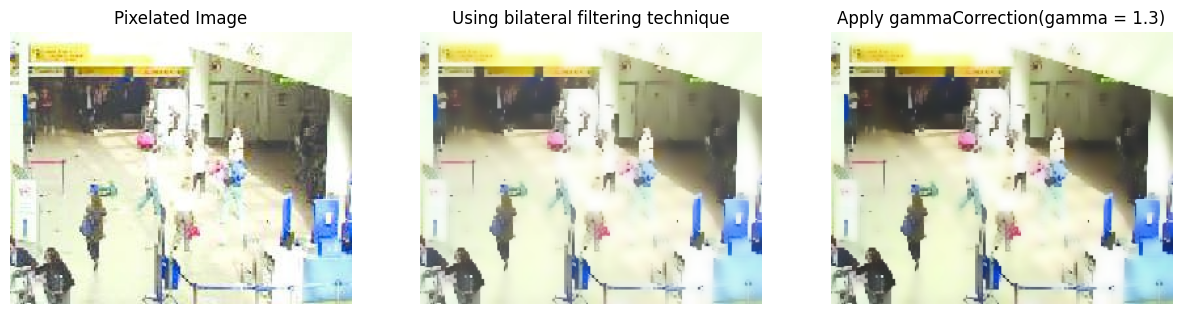

In [6]:
image2 = cv2.imread('/content/img2.jpg')

# Apply bilateral filtering
# d parameter specifies the size of the pixel neighborhood used during filtering
# A higher sigmaColor value allows more color variation within the neighborhood, resulting in a stronger smoothing effect.
# A lower sigmaColor value restricts the color variation, preserving edges and details better but providing less smoothing.
# A higher sigmaSpace value includes pixels farther away from the central pixel in the neighborhood, resulting in a stronger smoothing effect and potentially blurring edges and details more.
# A lower sigmaSpace value limits the spatial extent, preserving edges and details better but providing less smoothing.

smoothed_image = cv2.bilateralFilter(image2, d=11, sigmaColor=85, sigmaSpace=90)

# Convert the BGR images to RGB
smoothed_image_rgb = cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2RGB)

# Define the gamma value for gamma correction
gamma = 1.3
# Enhance the colors using gamma correction
adjustLight=Gamma_Correction(smoothed_image_rgb, gamma)

# Display images
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

axes[0].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
axes[0].set_title('Pixelated Image')
axes[0].axis('off')

axes[1].imshow(Image.fromarray(smoothed_image_rgb))
axes[1].set_title('Using bilateral filtering technique')
axes[1].axis('off')

axes[2].imshow(adjustLight)
axes[2].set_title('Apply gammaCorrection(gamma = {})'.format(gamma))
axes[2].axis('off')

plt.show()

# Image 8

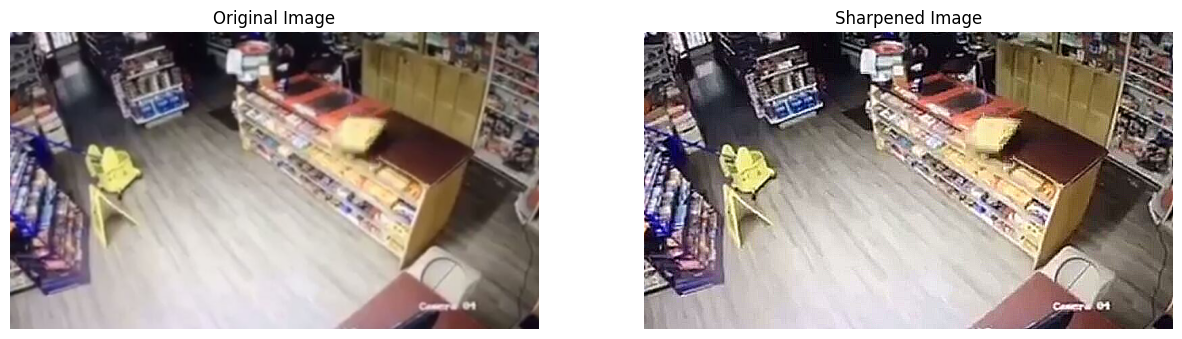

In [7]:
image4 = cv2.imread('/content/img4.jpg', cv2.IMREAD_UNCHANGED)

# Create a sharpening kernel
sharpen_filter = np.array([[-1, -1, -1],
                           [-1,  9, -1],
                           [-1, -1, -1]])

# Apply the sharpening kernel to the input image
sharp_image = cv2.filter2D(image4, -1, sharpen_filter)
sharp_image = cv2.cvtColor(sharp_image, cv2.COLOR_BGR2RGB)

# Display images
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(cv2.cvtColor(image4, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(sharp_image)
axes[1].set_title('Sharpened Image')
axes[1].axis('off')

plt.show()

# Image 9

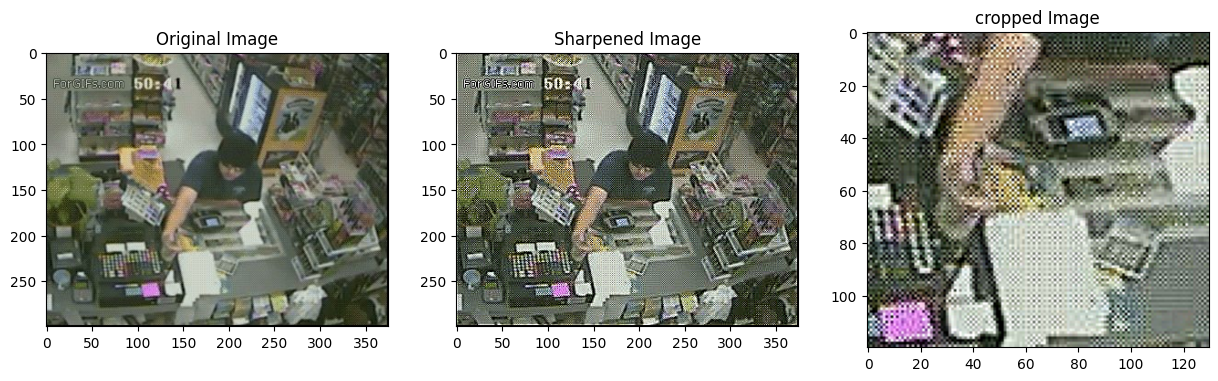

In [8]:
image5 = cv2.imread('/content/img5.jpg')

# Create the sharpening kernel
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Sharpen the image
sharpened_image = cv2.filter2D(image5, -1, kernel)

# crop image
y=100
x=150
h=230
w=270
crop_image = sharpened_image[x:w, y:h]

# Display images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(cv2.cvtColor(image5, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')

axes[1].imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Sharpened Image')

axes[2].imshow(cv2.cvtColor(crop_image, cv2.COLOR_BGR2RGB))
axes[2].set_title('cropped Image')

plt.show()


# Image 10

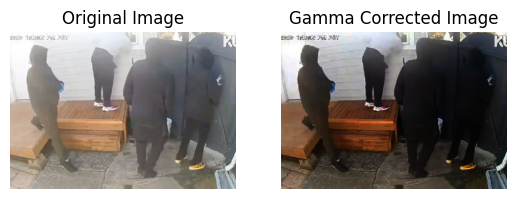

In [10]:
image = cv2.imread("/content/303.jpg")

# Convert the image to floating-point data type
image_float = image.astype(float) / 255.0

# Define the gamma correction function
def gamma_correction(channel, gamma):
    return np.power(channel, gamma)

# Define the gamma value
gamma = 2.6

# Perform gamma correction on each channel
gamma_corrected_b = gamma_correction(image_float[:, :, 0], gamma)
gamma_corrected_g = gamma_correction(image_float[:, :, 1], gamma)
gamma_corrected_r = gamma_correction(image_float[:, :, 2], gamma)

# Merge the color channels back into an RGB image
gamma_corrected_image = np.dstack((gamma_corrected_b, gamma_corrected_g, gamma_corrected_r))

# Convert the image back to the original data type
gamma_corrected_image = (gamma_corrected_image * 255).astype(np.uint8)

# Display images
fig, axes = plt.subplots(1, 2)

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(gamma_corrected_image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Gamma Corrected Image")
axes[1].axis("off")

plt.show()

# Image 11

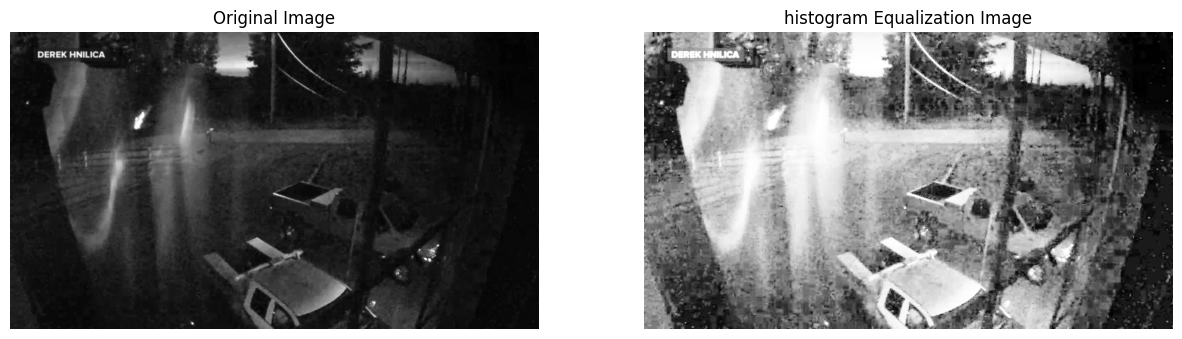

In [11]:
image = cv2.imread('/content/img45.jpg', cv2.IMREAD_GRAYSCALE)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display images
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(equalized_image, cmap='gray')
axes[1].set_title('histogram Equalization Image')
axes[1].axis('off')

plt.show()

# Image 12

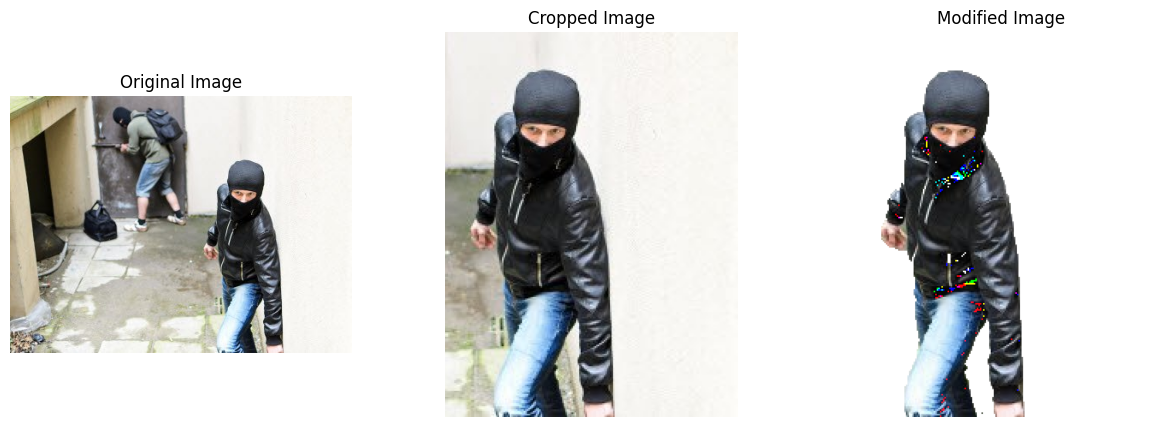

In [12]:
image_path = '/content/image12.jpg'
image = cv2.imread(image_path)

# Define the ROI coordinates for the person
x, y, h, w = 50, 210, 300, 560

# Crop the image to the ROI
roi_image = image[x:h, y:w]

# Create a mask for the background
mask = np.zeros(roi_image.shape[:2], np.uint8)

# Define background and foreground models
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Define the rectangle for GrabCut algorithm
rectangle = (10, 10, roi_image.shape[1] - 10, roi_image.shape[0] - 10)

# Apply GrabCut algorithm to update the mask
cv2.grabCut(roi_image, mask, rectangle, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Create a mask where the background is
background_mask = np.where((mask == 0) | (mask == 2), 0, 1).astype('uint8')

# Apply the background mask to the cropped image
background_removed = roi_image * background_mask[:, :, np.newaxis]

# Create a white background image
white_background = np.ones_like(roi_image) * 255

# Combine the background-removed image with the white background
final_image = white_background + background_removed

# Display images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(roi_image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Cropped Image")
axes[1].axis("off")

axes[2].imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
axes[2].set_title("Modified Image")
axes[2].axis("off")

plt.show()

# Image 13

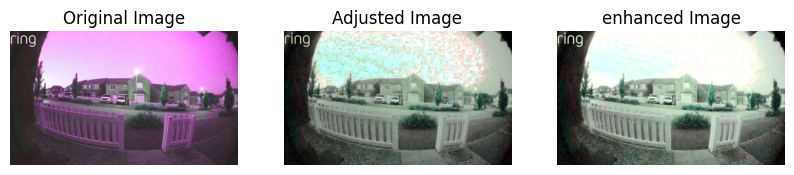

In [13]:
image = cv2.imread('/content/img13.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the RGB channels
r, g, b = cv2.split(image_rgb)

# Apply histogram equalization to each channel
r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

# Adjust the green channel
green_adjusted = cv2.addWeighted(g_eq, 0.2, b_eq, 0.9, 0)

# Merge the adjusted channels back into an RGB image
adjusted_image_rgb = cv2.merge((r_eq, green_adjusted, b_eq))

# Apply Bi-linear Interpolation to improve resolution
upscale_factor = 2  # Adjust the upscale factor as needed
upsampled_image = cv2.resize(adjusted_image_rgb, None, fx=upscale_factor, fy=upscale_factor, interpolation=cv2.INTER_LINEAR)

# Adjust the contrast using enhance_visibility function
alpha=1
beta=1.2
enhance_contrast=enhance_visibility(upsampled_image, alpha, beta)

# Display images
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].imshow(image_rgb)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(upsampled_image)
axes[1].set_title("Adjusted Image")
axes[1].axis("off")

axes[2].imshow(enhance_contrast)
axes[2].set_title("enhanced Image")
axes[2].axis("off")
plt.show()